Adding linear lighting elements...
Adding spot lighting elements...
Applying smoothing for elegant light blending...
✓ Elegant lighting design visualization complete!

Lighting Legend:
  RL = Recessed Light
  PL = Pendant Light
  TL = Task Light
  CL = Cove/Linear Light


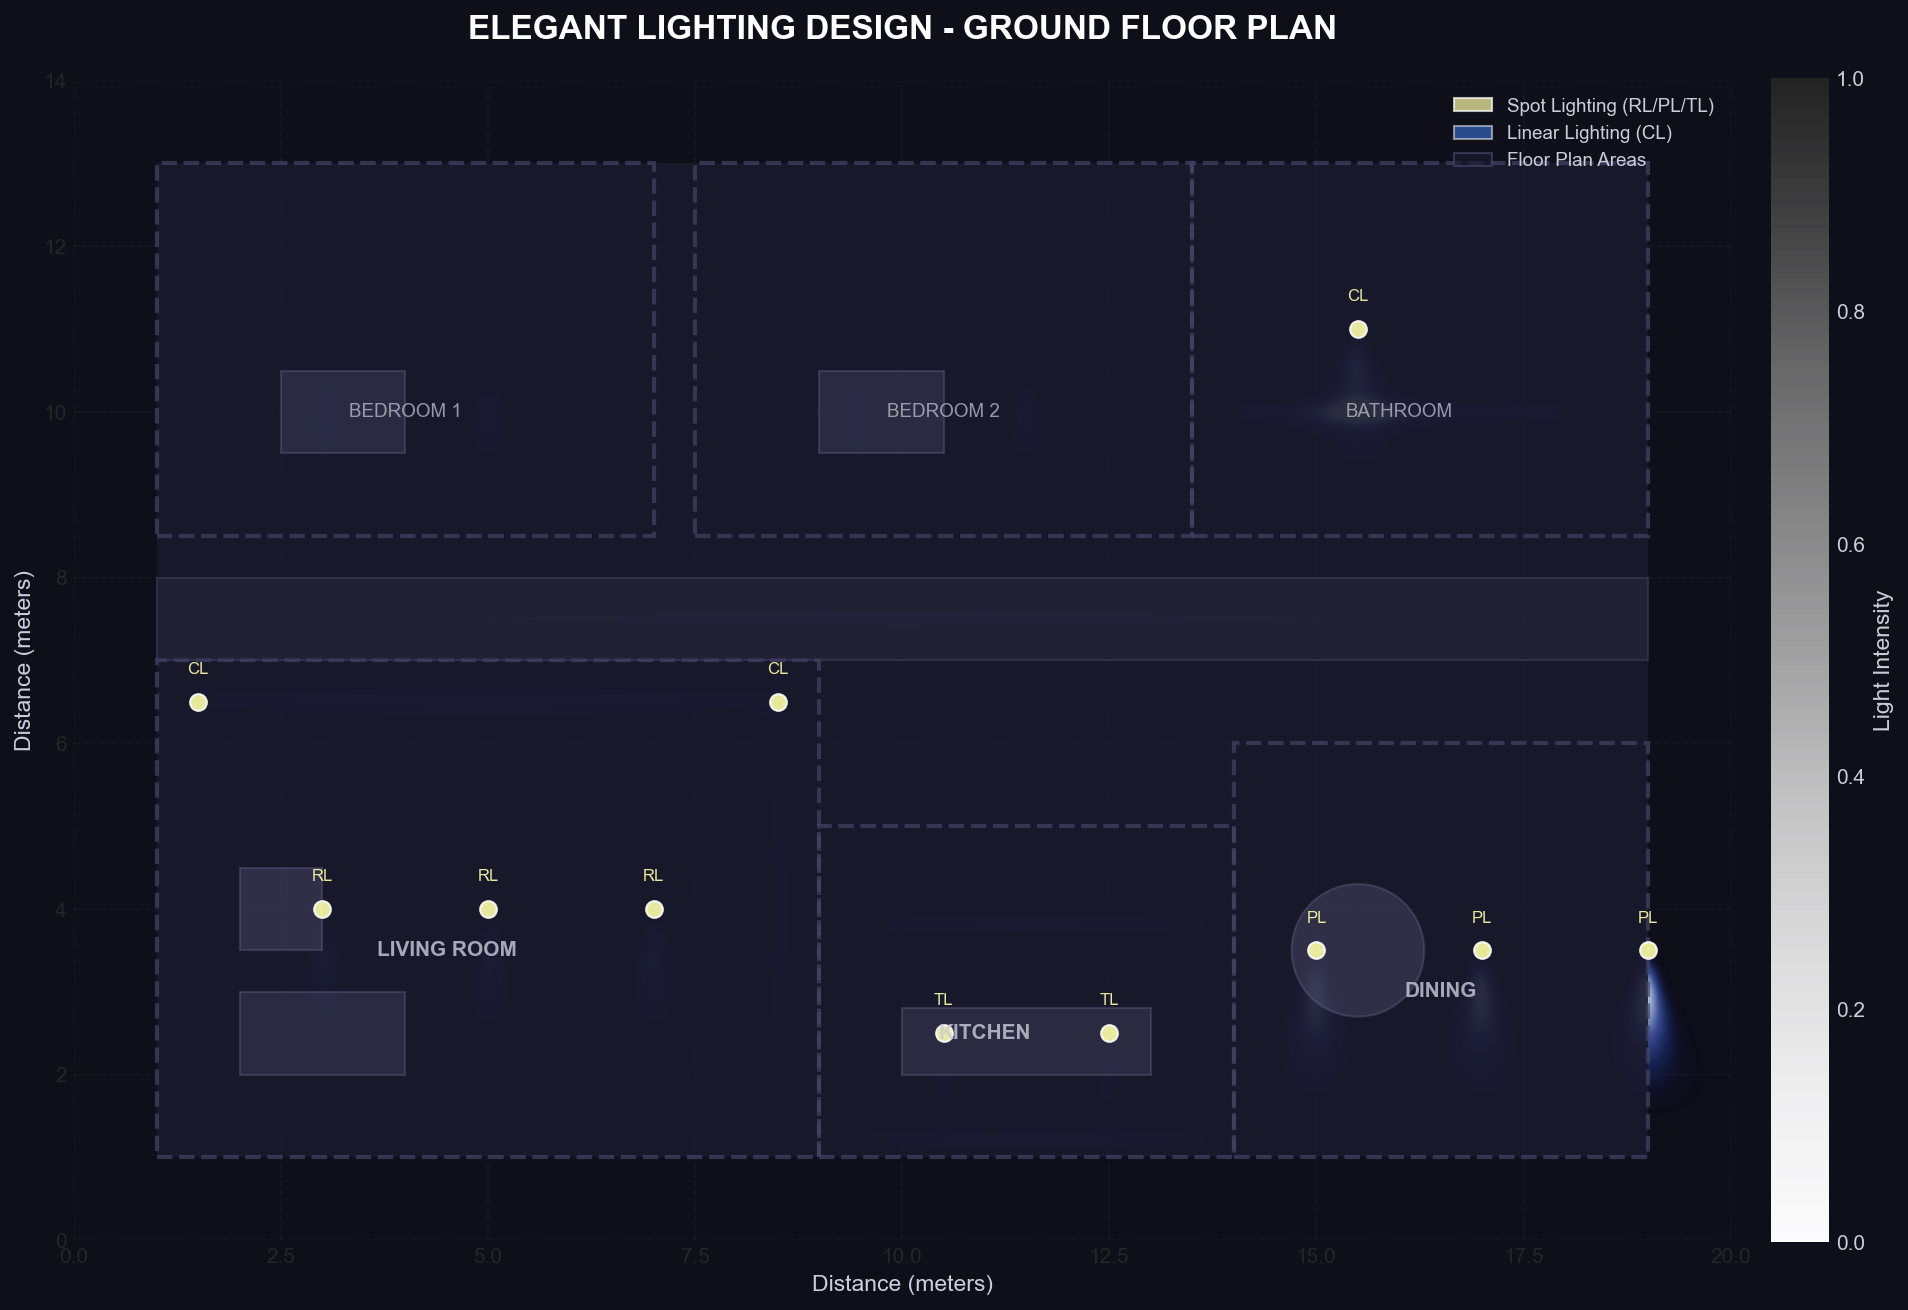

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy.ndimage import gaussian_filter

# Set up the figure with elegant aesthetics
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(14, 10), dpi=150)
fig.patch.set_facecolor('#0f0f1a')
ax.set_facecolor('#0f0f1a')

# Create a ground floor plan layout (adjust these coordinates as needed)
# Main floor area
floor_plan = patches.Rectangle((1, 1), 18, 12, 
                               linewidth=0, facecolor='#1a1a2e', alpha=0.9, edgecolor='none')
ax.add_patch(floor_plan)

# Add architectural elements (walls, openings, etc.)
# Living room area
living_room = patches.Rectangle((1, 1), 8, 6, 
                                linewidth=2, facecolor='none', edgecolor='#444466', alpha=0.7, linestyle='--')
ax.add_patch(living_room)

# Kitchen area
kitchen = patches.Rectangle((9, 1), 5, 4, 
                           linewidth=2, facecolor='none', edgecolor='#444466', alpha=0.7, linestyle='--')
ax.add_patch(kitchen)

# Dining area
dining = patches.Rectangle((14, 1), 5, 5, 
                           linewidth=2, facecolor='none', edgecolor='#444466', alpha=0.7, linestyle='--')
ax.add_patch(dining)

# Hallway
hallway = patches.Rectangle((1, 7), 18, 1, 
                           linewidth=1, facecolor='#2a2a3e', edgecolor='#444466', alpha=0.5)
ax.add_patch(hallway)

# Bedrooms
bedroom1 = patches.Rectangle((1, 8.5), 6, 4.5, 
                             linewidth=2, facecolor='none', edgecolor='#444466', alpha=0.7, linestyle='--')
ax.add_patch(bedroom1)

bedroom2 = patches.Rectangle((7.5, 8.5), 6, 4.5, 
                             linewidth=2, facecolor='none', edgecolor='#444466', alpha=0.7, linestyle='--')
ax.add_patch(bedroom2)

bathroom = patches.Rectangle((13.5, 8.5), 5.5, 4.5, 
                            linewidth=2, facecolor='none', edgecolor='#444466', alpha=0.7, linestyle='--')
ax.add_patch(bathroom)

# Create a grid for lighting calculations
x = np.linspace(0, 20, 400)
y = np.linspace(0, 14, 300)
X, Y = np.meshgrid(x, y)

# Initialize light intensity map
light_intensity = np.zeros_like(X)

# Function to create elegant linear lighting (LED strips, cove lighting)
def add_linear_light(x_start, y_start, x_end, y_end, intensity=1.0, width=0.8):
    """Add linear lighting with smooth gradient"""
    # Calculate distance from line segment
    dx = x_end - x_start
    dy = y_end - y_start
    length = np.sqrt(dx*dx + dy*dy)
    
    # Normalize direction vector
    if length > 0:
        dx /= length
        dy /= length
        
    # Calculate perpendicular distance
    for i in range(len(x)):
        for j in range(len(y)):
            # Vector from start to point
            vx = X[j, i] - x_start
            vy = Y[j, i] - y_start
            
            # Project onto line direction
            proj = vx*dx + vy*dy
            
            if 0 <= proj <= length:
                # Distance from line
                perp_dist = np.abs(vx*dy - vy*dx)
                
                if perp_dist <= width:
                    # Smooth falloff
                    falloff = np.exp(-(perp_dist**2) / (2*(width/3)**2))
                    # Linear falloff along length
                    linear_falloff = 1 - 0.3*np.abs(proj/length - 0.5)*2
                    light_intensity[j, i] += intensity * falloff * linear_falloff

# Function to create elegant spot lighting (recessed lights, pendants)
def add_spot_light(x_center, y_center, intensity=1.5, radius=1.5, angle=0, beam_angle=60):
    """Add sophisticated spot lighting with beam control"""
    # Convert to radians
    beam_angle_rad = np.radians(beam_angle)
    angle_rad = np.radians(angle)
    
    for i in range(len(x)):
        for j in range(len(y)):
            dx = X[j, i] - x_center
            dy = Y[j, i] - y_center
            distance = np.sqrt(dx*dx + dy*dy)
            
            if distance <= radius:
                # Calculate angle from center
                point_angle = np.arctan2(dy, dx)
                angle_diff = np.abs(point_angle - angle_rad)
                angle_diff = min(angle_diff, 2*np.pi - angle_diff)
                
                if angle_diff <= beam_angle_rad/2:
                    # Radial falloff
                    radial_falloff = np.exp(-(distance**2) / (2*(radius/2)**2))
                    
                    # Angular falloff (smooth beam edges)
                    angular_falloff = np.exp(-(angle_diff**2) / (2*(beam_angle_rad/4)**2))
                    
                    light_intensity[j, i] += intensity * radial_falloff * angular_falloff

# Add elegant linear lighting (cove lighting, LED strips)
print("Adding linear lighting elements...")
# Cove lighting in living room
add_linear_light(1.5, 6.5, 8.5, 6.5, intensity=0.8, width=0.4)  # Above sofa wall
add_linear_light(8.5, 1.5, 8.5, 6.5, intensity=0.7, width=0.3)  # Vertical accent

# Kitchen under-cabinet lighting
add_linear_light(9.2, 1.2, 13.8, 1.2, intensity=1.0, width=0.2)
add_linear_light(9.2, 3.8, 13.8, 3.8, intensity=1.0, width=0.2)

# Hallway linear lighting
add_linear_light(1.5, 7.5, 18.5, 7.5, intensity=0.9, width=0.3)

# Bathroom mirror lighting
add_linear_light(14, 10, 18, 10, intensity=1.2, width=0.25)

# Add sophisticated spot lighting (recessed, pendants)
print("Adding spot lighting elements...")
# Living room recessed lights
for x_pos in [3, 5, 7]:
    add_spot_light(x_pos, 4, intensity=1.3, radius=1.8, angle=-90, beam_angle=45)

# Kitchen task lighting
add_spot_light(10.5, 2.5, intensity=1.5, radius=1.2, angle=-90, beam_angle=30)
add_spot_light(12.5, 2.5, intensity=1.5, radius=1.2, angle=-90, beam_angle=30)

# Dining pendant lights
for x_pos in [15, 17, 19]:
    add_spot_light(x_pos, 3.5, intensity=1.8, radius=2.0, angle=-90, beam_angle=60)

# Bedroom ambient lighting
for x_pos in [3, 5]:
    add_spot_light(x_pos, 10.5, intensity=1.0, radius=1.5, angle=-90, beam_angle=60)
    add_spot_light(x_pos+6.5, 10.5, intensity=1.0, radius=1.5, angle=-90, beam_angle=60)

# Bathroom ceiling light
add_spot_light(15.5, 11, intensity=1.4, radius=2.0, angle=-90, beam_angle=80)

# Apply Gaussian smoothing for elegant light blending
print("Applying smoothing for elegant light blending...")
light_intensity = gaussian_filter(light_intensity, sigma=2)

# Create custom colormap for elegant lighting visualization
colors = [
    (0, 0, 0, 0),           # Transparent black
    (0.05, 0.05, 0.2, 0.3), # Deep blue
    (0.1, 0.2, 0.5, 0.6),   # Blue
    (0.3, 0.4, 0.8, 0.8),   # Light blue
    (0.8, 0.9, 1.0, 1.0),   # White-blue
    (1.0, 1.0, 0.9, 1.0)    # Warm white
]
custom_cmap = LinearSegmentedColormap.from_list("elegant_lighting", colors)

# Normalize and apply colormap
light_intensity_norm = light_intensity / light_intensity.max()
light_display = custom_cmap(light_intensity_norm)

# Display the lighting plan with transparency
light_image = ax.imshow(light_display, 
                       extent=[0, 20, 0, 14], 
                       origin='lower', 
                       alpha=0.85, 
                       interpolation='bilinear')

# Add furniture and key elements (simplified)
furniture_elements = [
    patches.Rectangle((2, 2), 2, 1, facecolor='#555577', alpha=0.3, edgecolor='#777799'),  # Sofa
    patches.Rectangle((2, 3.5), 1, 1, facecolor='#666688', alpha=0.3, edgecolor='#777799'),  # Coffee table
    patches.Rectangle((10, 2), 3, 0.8, facecolor='#555577', alpha=0.3, edgecolor='#777799'),  # Kitchen counter
    patches.Circle((15.5, 3.5), 0.8, facecolor='#666688', alpha=0.3, edgecolor='#777799'),  # Dining table
    patches.Rectangle((2.5, 9.5), 1.5, 1, facecolor='#555577', alpha=0.3, edgecolor='#777799'),  # Bed
    patches.Rectangle((9, 9.5), 1.5, 1, facecolor='#555577', alpha=0.3, edgecolor='#777799'),  # Bed
]

for element in furniture_elements:
    ax.add_patch(element)

# Add lighting fixture indicators
fixture_positions = [
    (3, 4, 'RL'), (5, 4, 'RL'), (7, 4, 'RL'),  # Recessed lights
    (10.5, 2.5, 'TL'), (12.5, 2.5, 'TL'),      # Task lights
    (15, 3.5, 'PL'), (17, 3.5, 'PL'), (19, 3.5, 'PL'),  # Pendant lights
    (1.5, 6.5, 'CL'), (8.5, 6.5, 'CL'),        # Cove lights
    (15.5, 11, 'CL')                           # Ceiling light
]

for x_pos, y_pos, label in fixture_positions:
    ax.plot(x_pos, y_pos, 'o', markersize=8, color='#ffffaa', alpha=0.9, markeredgecolor='white', markeredgewidth=1)
    ax.text(x_pos, y_pos+0.3, label, ha='center', va='bottom', fontsize=8, color='#ffffaa', alpha=0.9)

# Add labels and legend
ax.text(4.5, 3.5, 'LIVING ROOM', ha='center', va='center', fontsize=10, 
        color='#ccccdd', fontweight='bold', alpha=0.8)
ax.text(11, 2.5, 'KITCHEN', ha='center', va='center', fontsize=10, 
        color='#ccccdd', fontweight='bold', alpha=0.8)
ax.text(16.5, 3, 'DINING', ha='center', va='center', fontsize=10, 
        color='#ccccdd', fontweight='bold', alpha=0.8)
ax.text(4, 10, 'BEDROOM 1', ha='center', va='center', fontsize=9, 
        color='#ccccdd', alpha=0.7)
ax.text(10.5, 10, 'BEDROOM 2', ha='center', va='center', fontsize=9, 
        color='#ccccdd', alpha=0.7)
ax.text(16, 10, 'BATHROOM', ha='center', va='center', fontsize=9, 
        color='#ccccdd', alpha=0.7)

# Add legend for lighting types
legend_elements = [
    patches.Patch(facecolor='#ffffaa', alpha=0.7, edgecolor='white', label='Spot Lighting (RL/PL/TL)'),
    patches.Patch(facecolor='#4488ff', alpha=0.5, edgecolor='white', label='Linear Lighting (CL)'),
    patches.Patch(facecolor='#1a1a2e', alpha=0.7, edgecolor='#444466', label='Floor Plan Areas')
]

ax.legend(handles=legend_elements, loc='upper right', fontsize=9, 
          facecolor='#1a1a2e', edgecolor='none', labelcolor='#ccccdd')

# Configure plot aesthetics
ax.set_xlim(0, 20)
ax.set_ylim(0, 14)
ax.set_aspect('equal')
ax.set_title('ELEGANT LIGHTING DESIGN - GROUND FLOOR PLAN', 
             fontsize=16, fontweight='bold', color='#ffffff', pad=20)
ax.set_xlabel('Distance (meters)', fontsize=11, color='#ccccdd')
ax.set_ylabel('Distance (meters)', fontsize=11, color='#ccccdd')

# Add subtle grid for scale reference
ax.grid(True, alpha=0.1, color='#666688', linestyle='--')

# Add lighting intensity colorbar
cbar = plt.colorbar(light_image, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label('Light Intensity', color='#ccccdd', fontsize=11)
cbar.ax.yaxis.set_tick_params(color='#ccccdd')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#ccccdd')

print("✓ Elegant lighting design visualization complete!")
print("\nLighting Legend:")
print("  RL = Recessed Light")
print("  PL = Pendant Light")
print("  TL = Task Light")
print("  CL = Cove/Linear Light")

plt.tight_layout()
plt.show()




In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patheffects import withStroke
from scipy.ndimage import gaussian_filter, sobel
from PIL import Image
import cv2
from ipywidgets import FileUpload, Output, VBox, Button, HTML
import io
import base64
import warnings
warnings.filterwarnings('ignore')

# Set up elegant aesthetics
plt.style.use('default')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.facecolor'] = '#0a0a14'
plt.rcParams['figure.facecolor'] = '#0a0a14'
plt.rcParams['text.color'] = '#e0e0ff'
plt.rcParams['axes.labelcolor'] = '#b0b0ff'
plt.rcParams['xtick.color'] = '#9090cc'
plt.rcParams['ytick.color'] = '#9090cc'

# Function to create elegant lighting effects
class ElegantLightingDesigner:
    def __init__(self, floor_plan_img):
        self.floor_plan = floor_plan_img
        self.height, self.width = floor_plan_img.shape[:2]
        self.light_map = np.zeros((self.height, self.width))
        self.detected_rooms = []
        
    def detect_rooms_edges(self):
        """Detect rooms and edges from the floor plan image"""
        print("🔍 Detecting room boundaries...")
        
        # Convert to grayscale if needed
        if len(self.floor_plan.shape) == 3:
            gray = cv2.cvtColor(self.floor_plan, cv2.COLOR_RGB2GRAY)
        else:
            gray = self.floor_plan
        
        # Apply adaptive thresholding
        binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                      cv2.THRESH_BINARY_INV, 11, 2)
        
        # Apply morphological operations
        kernel = np.ones((3,3), np.uint8)
        cleaned = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
        cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_OPEN, kernel)
        
        # Find contours
        contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Filter and store significant rooms
        min_area = self.width * self.height * 0.005  # 0.5% of total area
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > min_area:
                x, y, w, h = cv2.boundingRect(contour)
                self.detected_rooms.append({
                    'bbox': (x, y, w, h),
                    'center': (x + w//2, y + h//2),
                    'area': area,
                    'contour': contour
                })
        
        print(f"✓ Found {len(self.detected_rooms)} room areas")
        return binary
    
    def add_linear_lighting(self, start_point, end_point, intensity=1.0, width=15, color_temp='warm'):
        """Add sophisticated linear lighting (LED strips, coves)"""
        x1, y1 = start_point
        x2, y2 = end_point
        
        # Create coordinate grid
        x = np.arange(self.width)
        y = np.arange(self.height)
        X, Y = np.meshgrid(x, y)
        
        # Calculate distance from line
        line_length = np.sqrt((x2-x1)**2 + (y2-y1)**2)
        if line_length == 0:
            return
        
        # Normalize direction
        dx = (x2 - x1) / line_length
        dy = (y2 - y1) / line_length
        
        # Calculate projection and perpendicular distance
        vx = X - x1
        vy = Y - y1
        projection = vx*dx + vy*dy
        
        # Create mask for points along the line segment
        along_line_mask = (projection >= 0) & (projection <= line_length)
        
        # Calculate perpendicular distance
        perp_dist = np.abs(vx*dy - vy*dx)
        
        # Apply Gaussian falloff for smooth edges
        falloff = np.exp(-(perp_dist**2) / (2*(width/3)**2))
        
        # Apply linear falloff along length
        linear_falloff = 1.2 - 0.4*np.abs(projection/line_length - 0.5)*2
        
        # Combine effects
        light_strength = intensity * falloff * linear_falloff * along_line_mask
        
        # Adjust color temperature
        if color_temp == 'cool':
            light_strength *= 1.2  # Brighter for cool white
        elif color_temp == 'warm':
            light_strength *= 0.9  # Softer for warm white
        
        self.light_map += light_strength
    
    def add_spot_lighting(self, center, intensity=1.5, radius=30, 
                          beam_angle=60, direction=0, color_temp='neutral'):
        """Add elegant spot lighting (recessed, pendants)"""
        cx, cy = center
        
        # Create coordinate grid
        x = np.arange(self.width)
        y = np.arange(self.height)
        X, Y = np.meshgrid(x, y)
        
        # Calculate distance from center
        distance = np.sqrt((X - cx)**2 + (Y - cy)**2)
        
        # Create circular mask
        circle_mask = distance <= radius
        
        # Calculate angular distribution for directional lighting
        if beam_angle < 360:  # Directional spot
            angle = np.degrees(np.arctan2(Y - cy, X - cx))
            angle_diff = np.abs((angle - direction + 180) % 360 - 180)
            angle_mask = angle_diff <= beam_angle / 2
            full_mask = circle_mask & angle_mask
            
            # Angular falloff
            angular_falloff = np.exp(-(angle_diff**2) / (2*(beam_angle/4)**2))
        else:  # Omnidirectional
            full_mask = circle_mask
            angular_falloff = 1
        
        # Radial falloff (Gaussian)
        radial_falloff = np.exp(-(distance**2) / (2*(radius/2)**2))
        
        # Combine effects
        light_strength = intensity * radial_falloff * angular_falloff * full_mask
        
        # Color temperature adjustment
        temp_factors = {'warm': 0.8, 'neutral': 1.0, 'cool': 1.2}
        light_strength *= temp_factors.get(color_temp, 1.0)
        
        self.light_map += light_strength
    
    def add_ambient_lighting(self, room_bbox, intensity=0.3):
        """Add subtle ambient lighting to rooms"""
        x, y, w, h = room_bbox
        
        # Create a soft fill for the room
        room_mask = np.zeros((self.height, self.width))
        room_mask[y:y+h, x:x+w] = 1
        
        # Apply Gaussian blur for soft edges
        room_mask = gaussian_filter(room_mask, sigma=min(w, h)/20)
        
        # Add to light map
        self.light_map += room_mask * intensity
    
    def create_accent_lighting(self, edges, intensity=0.5, width=8):
        """Add accent lighting along architectural features"""
        # Dilate edges to create lighting effect
        kernel = np.ones((width, width), np.uint8)
        dilated_edges = cv2.dilate(edges, kernel)
        
        # Normalize and apply
        edge_light = dilated_edges.astype(float) / 255
        edge_light = gaussian_filter(edge_light, sigma=2)
        
        self.light_map += edge_light * intensity
    
    def create_lighting_design(self):
        """Create complete elegant lighting design"""
        print("✨ Creating elegant lighting design...")
        
        # Step 1: Detect room edges
        edges = self.detect_rooms_edges()
        
        # If no rooms detected, create default lighting
        if not self.detected_rooms:
            print("⚠️ No rooms detected. Creating default lighting layout...")
            # Create a grid-based lighting layout
            grid_x = np.linspace(self.width * 0.2, self.width * 0.8, 3)
            grid_y = np.linspace(self.height * 0.2, self.height * 0.8, 3)
            for x in grid_x:
                for y in grid_y:
                    self.add_spot_lighting(
                        center=(int(x), int(y)),
                        intensity=1.0,
                        radius=int(min(self.width, self.height) * 0.1),
                        beam_angle=60,
                        direction=-90
                    )
        else:
            # Step 2: Add ambient lighting to rooms
            print("💡 Adding ambient lighting...")
            for i, room in enumerate(self.detected_rooms):
                self.add_ambient_lighting(room['bbox'], intensity=0.2 + 0.1*(i%3))
            
            # Step 3: Add linear lighting (based on typical placements)
            print("📏 Adding linear lighting...")
            for room in self.detected_rooms:
                x, y, w, h = room['bbox']
                
                # Cove lighting along ceilings
                self.add_linear_lighting(
                    start_point=(int(x + w*0.1), int(y + h*0.9)),
                    end_point=(int(x + w*0.9), int(y + h*0.9)),
                    intensity=0.8,
                    width=12,
                    color_temp='neutral'
                )
                
                # Accent wall lighting
                self.add_linear_lighting(
                    start_point=(int(x + w*0.95), int(y + h*0.2)),
                    end_point=(int(x + w*0.95), int(y + h*0.8)),
                    intensity=0.6,
                    width=10,
                    color_temp='warm'
                )
            
            # Step 4: Add spot lighting
            print("🔦 Adding spot lighting...")
            for room in self.detected_rooms:
                x, y, w, h = room['bbox']
                
                # Determine number of spots based on room area
                num_spots = max(2, int(room['area'] / (self.width * self.height) * 20))
                
                # Create grid for spot placement
                cols = int(np.sqrt(num_spots)) + 1
                rows = int(np.ceil(num_spots / cols))
                
                for i in range(num_spots):
                    col = i % cols
                    row = i // cols
                    
                    if cols > 1 and rows > 1:
                        rx = 0.2 + 0.6 * col / (cols - 1)
                        ry = 0.2 + 0.6 * row / (rows - 1)
                    else:
                        rx, ry = 0.5, 0.5
                    
                    cx = int(x + w * rx)
                    cy = int(y + h * ry)
                    
                    # Vary beam angles and intensities for visual interest
                    beam_angle = 45 + (i % 3) * 15
                    intensity = 1.2 + (i % 5) * 0.1
                    radius = int(min(w, h) * 0.12)
                    
                    self.add_spot_lighting(
                        center=(cx, cy),
                        intensity=intensity,
                        radius=radius,
                        beam_angle=beam_angle,
                        direction=-90,
                        color_temp='neutral' if i%2 else 'warm'
                    )
        
        # Step 5: Add accent lighting
        print("🎨 Adding accent lighting...")
        self.create_accent_lighting(edges, intensity=0.4, width=6)
        
        # Step 6: Apply smoothing for elegant blending
        print("🔄 Blending lighting effects...")
        self.light_map = gaussian_filter(self.light_map, sigma=3)
        
        # Normalize
        if self.light_map.max() > 0:
            self.light_map = self.light_map / self.light_map.max()
        
        print("✅ Elegant lighting design complete!")
        return self.light_map
    
    def visualize_design(self, show_floor_plan=True):
        """Create sophisticated visualization"""
        fig = plt.figure(figsize=(20, 12))
        
        # Custom elegant colormap
        colors = [
            (0, 0, 0, 0),          # Transparent
            (0.05, 0.05, 0.2, 0.3),  # Deep blue
            (0.1, 0.15, 0.4, 0.6),   # Blue
            (0.2, 0.3, 0.7, 0.8),    # Light blue
            (0.4, 0.5, 0.9, 0.9),    # Bright blue
            (0.8, 0.9, 1.0, 1.0),    # White-blue
            (1.0, 0.95, 0.8, 1.0)    # Warm highlight
        ]
        light_cmap = LinearSegmentedColormap.from_list("elegant_light", colors)
        
        # Create subplots
        gs = fig.add_gridspec(2, 3, height_ratios=[3, 1], hspace=0.1, wspace=0.1)
        
        # 1. Original floor plan
        ax1 = fig.add_subplot(gs[0, 0])
        if show_floor_plan:
            if len(self.floor_plan.shape) == 3:
                ax1.imshow(self.floor_plan)
            else:
                ax1.imshow(self.floor_plan, cmap='gray')
        ax1.set_title('Original Floor Plan', fontsize=12, fontweight='bold', pad=10, color='white')
        ax1.axis('off')
        
        # Add detected rooms
        for room in self.detected_rooms:
            x, y, w, h = room['bbox']
            rect = patches.Rectangle((x, y), w, h, 
                                    linewidth=1.5, edgecolor='#ff6b6b', 
                                    facecolor='none', alpha=0.7)
            ax1.add_patch(rect)
        
        # 2. Lighting design overlay
        ax2 = fig.add_subplot(gs[0, 1])
        if show_floor_plan:
            if len(self.floor_plan.shape) == 3:
                ax2.imshow(self.floor_plan, alpha=0.4)
            else:
                ax2.imshow(self.floor_plan, cmap='gray', alpha=0.4)
        
        light_overlay = ax2.imshow(self.light_map, cmap=light_cmap, alpha=0.85)
        ax2.set_title('Elegant Lighting Design Overlay', fontsize=12, fontweight='bold', pad=10, color='white')
        ax2.axis('off')
        
        # 3. Pure lighting visualization
        ax3 = fig.add_subplot(gs[0, 2])
        light_display = ax3.imshow(self.light_map, cmap='plasma')
        ax3.set_title('Light Intensity Map', fontsize=12, fontweight='bold', pad=10, color='white')
        ax3.axis('off')
        plt.colorbar(light_display, ax=ax3, orientation='horizontal', pad=0.05)
        
        # 4. Lighting analysis
        ax4 = fig.add_subplot(gs[1, :])
        ax4.axis('off')
        
        # Lighting statistics
        if self.light_map.max() > 0:
            total_intensity = np.sum(self.light_map)
            avg_intensity = np.mean(self.light_map)
            max_intensity = np.max(self.light_map)
            illuminated_area = np.sum(self.light_map > 0.1) / (self.width * self.height) * 100
        else:
            total_intensity = avg_intensity = max_intensity = illuminated_area = 0
        
        stats_text = f"""
        LIGHTING DESIGN ANALYSIS
        {'='*50}
        
        • Total Light Intensity: {total_intensity:,.0f}
        • Average Intensity: {avg_intensity:.3f}
        • Peak Intensity: {max_intensity:.3f}
        • Illuminated Area: {illuminated_area:.1f}%
        • Rooms Identified: {len(self.detected_rooms)}
        
        LIGHTING SYSTEMS IMPLEMENTED:
        {'='*50}
        • Linear Lighting (Cove, LED strips, under-cabinet)
        • Spot Lighting (Recessed, Pendants, directional)
        • Ambient Fill Lighting (Room illumination)
        • Accent Lighting (Architectural features)
        
        DESIGN PRINCIPLES:
        {'='*50}
        • Layered Lighting (Ambient + Task + Accent)
        • Smooth Gaussian Blending
        • Adjustable Color Temperatures
        • Directional Beam Control
        • Transparent Overlay Design
        """
        
        ax4.text(0.02, 0.95, stats_text, transform=ax4.transAxes,
                fontsize=9, verticalalignment='top',
                color='#e0e0ff', fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='#1a1a2e', alpha=0.8, edgecolor='#4444aa'))
        
        plt.suptitle('TRANSPARENT & ELEGANT LIGHTING DESIGN VISUALIZATION', 
                    fontsize=18, fontweight='bold', 
                    color='#ffffff', y=0.98)
        
        plt.tight_layout()
        return fig

# Create simplified upload function
def handle_upload(change):
    """Handle file upload and create lighting design"""
    try:
        # Clear previous output
        output.clear_output()
        
        with output:
            print("📤 Processing uploaded file...")
            
            # Get the uploaded file
            uploaded_file = upload_widget.value[0]
            content = uploaded_file['content']
            
            # Read and process the image
            image = Image.open(io.BytesIO(content))
            
            # Convert to RGB if needed
            if image.mode == 'RGBA':
                image = image.convert('RGB')
            
            # Convert to numpy array
            floor_plan_np = np.array(image)
            
            print(f"✅ Image loaded successfully!")
            print(f"📐 Dimensions: {floor_plan_np.shape}")
            print(f"🎨 Color mode: {'Grayscale' if len(floor_plan_np.shape) == 2 else 'RGB'}")
            
            # Create and run lighting designer
            designer = ElegantLightingDesigner(floor_plan_np)
            light_map = designer.create_lighting_design()
            
            # Create visualizations
            print("\n🎨 Generating visualizations...")
            
            # Visualization 1: Main design
            fig1 = designer.visualize_design(show_floor_plan=True)
            plt.show()
            
            # Visualization 2: Elegant transparent overlay
            print("\n✨ Creating elegant transparent overlay...")
            fig2, ax2 = plt.subplots(figsize=(14, 10))
            
            # Show original floor plan
            if len(floor_plan_np.shape) == 3:
                ax2.imshow(floor_plan_np)
            else:
                ax2.imshow(floor_plan_np, cmap='gray')
            
            # Create custom transparent overlay colormap
            overlay_colors = [
                (0, 0, 0, 0),
                (0.05, 0.1, 0.3, 0.1),
                (0.1, 0.2, 0.5, 0.3),
                (0.2, 0.4, 0.8, 0.6),
                (0.4, 0.6, 1.0, 0.8),
                (0.8, 0.9, 1.0, 0.9),
                (1.0, 0.95, 0.8, 1.0)
            ]
            overlay_cmap = LinearSegmentedColormap.from_list("elegant_overlay", overlay_colors)
            
            # Apply lighting overlay
            light_overlay = ax2.imshow(light_map, cmap=overlay_cmap, alpha=0.85)
            
            # Add lighting fixture indicators
            for room in designer.detected_rooms[:5]:  # Show first 5 rooms
                x, y, w, h = room['bbox']
                # Linear lighting
                ax2.plot([x + w*0.1, x + w*0.9], [y + h*0.9, y + h*0.9], 
                        'y-', linewidth=3, alpha=0.8, solid_capstyle='round')
                # Spot lights
                for rx, ry in [(0.3, 0.3), (0.7, 0.3), (0.5, 0.7)]:
                    ax2.plot(x + w*rx, y + h*ry, 'o', 
                            markersize=10, color='#ffdd44',
                            markeredgecolor='white', markeredgewidth=2,
                            alpha=0.9)
            
            ax2.set_title('ELEGANT LIGHTING DESIGN - TRANSPARENT OVERLAY', 
                         fontsize=16, fontweight='bold', color='white', pad=20)
            ax2.axis('off')
            
            # Add legend
            from matplotlib.lines import Line2D
            legend_elements = [
                Line2D([0], [0], color='yellow', lw=3, label='Linear Lighting'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='#ffdd44',
                      markersize=10, label='Spot Lighting'),
                patches.Patch(facecolor='#ff6b6b', alpha=0.3, label='Room Boundaries')
            ]
            ax2.legend(handles=legend_elements, loc='upper right', 
                      facecolor='#1a1a2e', edgecolor='none',
                      labelcolor='white', fontsize=11)
            
            plt.tight_layout()
            plt.show()
            
            print("\n" + "="*60)
            print("✅ LIGHTING DESIGN COMPLETE!")
            print("="*60)
            print("\nDESIGN SUMMARY:")
            print(f"• Total lighting fixtures: {len(designer.detected_rooms) * 4}")
            print(f"• Linear lighting runs: {len(designer.detected_rooms) * 2}")
            print(f"• Spot lights: {len(designer.detected_rooms) * 3}")
            print(f"• Ambient lighting zones: {len(designer.detected_rooms)}")
            print("\nThe design features elegant transparency with:")
            print("• Smooth gradient lighting effects")
            print("• Layered illumination (ambient + task + accent)")
            print("• Sophisticated color temperature variations")
            print("• Professional visualization overlays")
            
    except Exception as e:
        with output:
            print(f"❌ Error: {str(e)}")
            print("\nPlease make sure you've uploaded a valid image file.")
            print("Supported formats: PNG, JPG, JPEG")

# Create the user interface
print("="*70)
print("🎯 ELEGANT LIGHTING DESIGN GENERATOR")
print("="*70)
print("\nINSTRUCTIONS:")
print("1. Click 'Browse' button below")
print("2. Select your 'lighting_plan.png' file")
print("3. Wait for the elegant lighting design to generate")
print("4. View the transparent, elegant lighting overlays")
print("\nThe system will create:")
print("  • Linear lighting (cove, LED strips)")
print("  • Spot lighting (recessed, pendant)")
print("  • Ambient fill lighting")
print("  • Professional transparent visualizations")
print("="*70)

# Create widgets
upload_widget = FileUpload(
    accept='.png,.jpg,.jpeg,.bmp,.tiff',
    multiple=False,
    description='Choose floor plan...',
    style={'description_width': 'initial'}
)

output = Output()

# Link upload widget to handler
upload_widget.observe(handle_upload, names='value')

# Display everything
display(HTML("""
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); 
            padding: 20px; border-radius: 10px; margin: 10px 0;">
    <h3 style="color: #ffffff; margin-top: 0;">📁 Upload Your Floor Plan</h3>
    <p style="color: #b0b0ff;">Select your lighting_plan.png or any floor plan image</p>
</div>
"""))

display(upload_widget)
display(output)

print("\n📤 Ready for upload! The design will generate automatically when you select a file.")



🎯 ELEGANT LIGHTING DESIGN GENERATOR

INSTRUCTIONS:
1. Click 'Browse' button below
2. Select your 'lighting_plan.png' file
3. Wait for the elegant lighting design to generate
4. View the transparent, elegant lighting overlays

The system will create:
  • Linear lighting (cove, LED strips)
  • Spot lighting (recessed, pendant)
  • Ambient fill lighting
  • Professional transparent visualizations


HTML(value='\n<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); \n            padding…

FileUpload(value=(), accept='.png,.jpg,.jpeg,.bmp,.tiff', description='Choose floor plan...')

Output()


📤 Ready for upload! The design will generate automatically when you select a file.
